In [9]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Jan  7 14:23:41 2025).


In [11]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [12]:
df_DA_US_exploded = df_DA_US.explode("job_skills")
df_DA_US_exploded[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [13]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})

In [14]:
DA_job_count = len(df_DA_US)
DA_job_count

1118

In [15]:
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
...,...,...,...
sqlite,1,77500.0,0.089445
theano,1,100000.0,0.089445
typescript,1,65000.0,0.089445


In [47]:

skill_percent = 6
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


In [18]:
df_DA_skills.head(10)

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


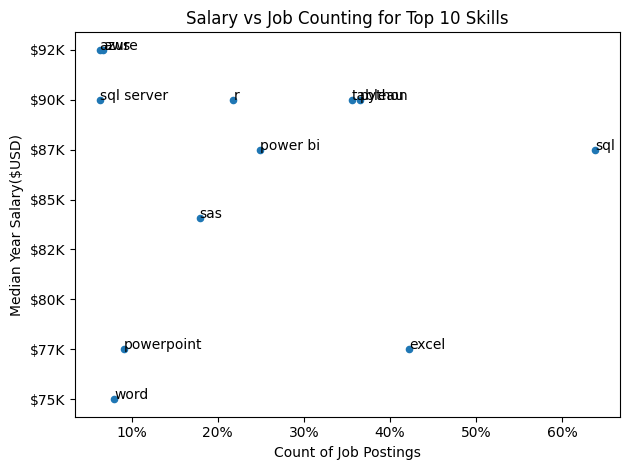

In [42]:
from matplotlib.ticker import PercentFormatter
df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary',xlabel='Count of Job Postings',ylabel='Median Year Salary($USD)',title='Salary vs Job Counting for Top 10 Skills')

for i, txt in enumerate(df_DA_skills_high_demand.index):
    plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()
